<a href="https://colab.research.google.com/github/gangasani-anusha/DataMining_Dimensionality_Reduction/blob/main/Dimensionality_Reduction_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import OrderedDict
from functools import partial
from time import time
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from numpy.linalg import svd
from umap import UMAP
from sklearn.utils import resample
import umap
import seaborn as sns
from sklearn.datasets import fetch_openml
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
Axes3D
lle_points = 500

In [100]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [101]:
flower_data = cv2.imread('gdrive/My Drive/SJSU_Data_Mining/flower.jpeg')

# Principal Component Analysis


## `Image Data`

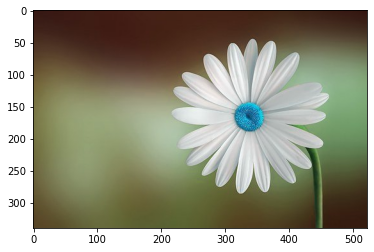

In [109]:
flower_data = cv2.imread('gdrive/My Drive/SJSU_Data_Mining/flower.jpeg') 
plt.imshow(flower_data)

In [110]:
blue,green,red = cv2.split(flower_data) 

In [111]:
#initialize PCA with first 5 principal components
pca_data_5 = PCA(5)
 
#Applying to red, green and blue channels and then applying inverse transform to transformed array.
red_channel = pca_data_5.fit_transform(red)
red_inverted_channel = pca_data_5.inverse_transform(red_channel)
green_channel = pca_data_5.fit_transform(green)
green_inverted_channel = pca_data_5.inverse_transform(green_channel)
blue_channel = pca_data_5.fit_transform(blue)
blue_inverted_channel = pca_data_5.inverse_transform(blue_channel)

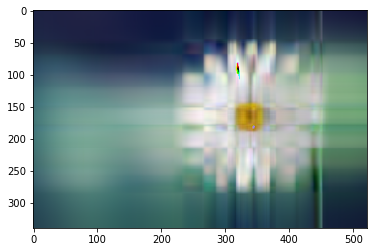

In [112]:
flower_compressed = (np.dstack((red_inverted_channel, green_inverted_channel, blue_inverted_channel))).astype(np.uint8)
#viewing the compressed image
plt.imshow(flower_compressed)

In [113]:
#initialize PCA with first 200 principal components
pca_data_200 = PCA(200)
 
#Applying to red, green and blue channels and then applying inverse transform to transformed array.
red_channel_200 = pca_data_200.fit_transform(red)
red_inverted_channel_200 = pca_data_200.inverse_transform(red_channel_200)
green_channel_200 = pca_data_200.fit_transform(green)
green_inverted_channel_200 = pca_data_200.inverse_transform(green_channel_200)
blue_channel_200 = pca_data_200.fit_transform(blue)
blue_inverted_channel_200 = pca_data_200.inverse_transform(blue_channel_200)

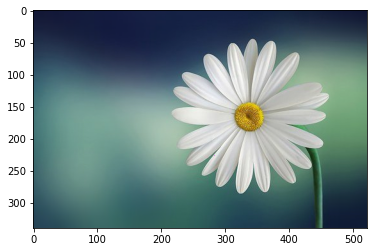

In [114]:
flower_compressed_200 = (np.dstack((red_inverted_channel_200, green_inverted_channel_200, blue_inverted_channel_200))).astype(np.uint8)
#viewing the compressed image
plt.imshow(flower_compressed_200)

## `Tabular Data`

In [115]:
# Importing the data
pca_car_data_set = px.data.carshare()
new_pca_data = pca_car_data_set[['centroid_lat', 'centroid_lon', 'peak_hour']]

# Implementation of PCA dimensionality Reduction Technique
pca_tabular_data = PCA(n_components=3)
pca_components = pca_tabular_data.fit_transform(new_pca_data)

# Displaying in the 3D-scatter plot after applying dimensionality reduction
pca_result_3d = px.scatter_3d(
    pca_components, x=0, y=1, z=2, color=pca_car_data_set['car_hours'],
    title=f'PCA-Dimensionality Reduction Technique',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
pca_result_3d.show()

# Singular value decomposition


## `Image Data`

In [116]:
svd_flower_data = cv2.imread('gdrive/My Drive/SJSU_Data_Mining/flower.jpeg', 0) 
# obtain svd
U, S, V = np.linalg.svd(svd_flower_data)

# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

# plot images with different number of components
svd_components = [340, 250, 100, 50, 10, 5]

(340, 340) (340,) (522, 522)


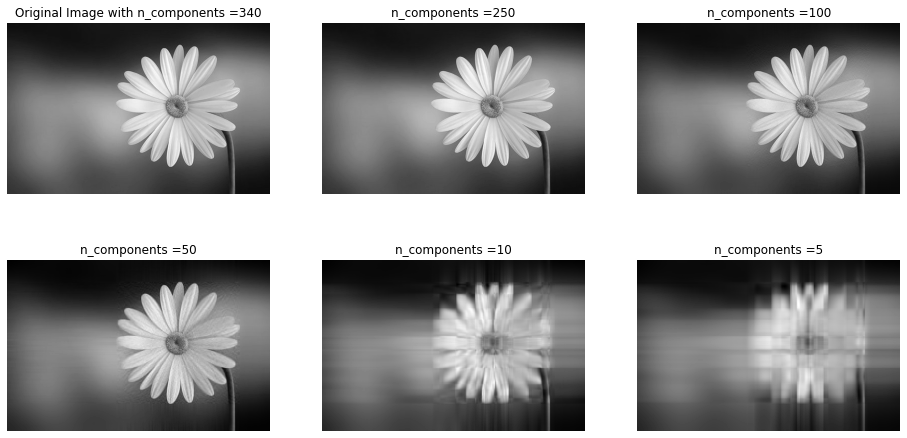

In [117]:
plt.figure(figsize = (16, 8))
for i in range(6):
 low_rank = U[:, :svd_components[i]] @ np.diag(S[:svd_components[i]]) @ V[:svd_components[i], :]
 if(i  == 0):
    plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(svd_components[i]))
 else:
    plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(svd_components[i]))


## `Tabular Data`

In [118]:
# define your matrix as a numpy array
svd_array = np.array([[12,10,8], [13,16,19], [21,14,7]])
U, S, VT = svd(svd_array)
print(U @ np.diag(S) @ VT)

# Displaying in the 3D-scatter plot after applying dimensionality reduction
svd_result_3d = px.scatter_3d(
    svd_array, x=0, y=1, z=2, 
    title=f'SVD-Dimensionality Reduction Technique',
    labels={'0': 'U', '1': 'S', '2': 'VT'}
)
svd_result_3d.show()

[[12. 10.  8.]
 [13. 16. 19.]
 [21. 14.  7.]]


# Locally Linear Embedding 

## `Image Data`

LLE: 0.1 sec


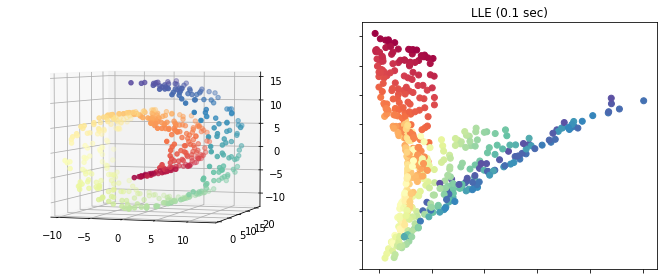

In [119]:
#We load the swiss roll dataset
data_X, color = datasets.make_swiss_roll(lle_points, random_state=0)
lle_neighbors = 10
lle_components = 2

lle_plot = plt.figure(figsize=(18, 10))
# Adding 3d scatter plot
lle_3d = lle_plot.add_subplot(231, projection='3d')
lle_3d.scatter(data_X[:, 0], data_X[:, 1], data_X[:, 2], c=color, cmap=plt.cm.Spectral)
lle_3d.view_init(4, -72)
# Making a dictionary 'methods' containing LLE
LLE = partial(manifold.LocallyLinearEmbedding, n_neighbors, n_components, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    transformed_X = method.fit_transform(data_X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    lle_3d = lle_plot.add_subplot(2, 3, 2 + i+(i>1))
    lle_3d.scatter(transformed_X[:, 0], transformed_X[:, 1], c=color, cmap=plt.cm.Spectral)
    lle_3d.set_title("%s (%.2g sec)" % (label, t1 - t0))
    lle_3d.xaxis.set_major_formatter(NullFormatter())
    lle_3d.yaxis.set_major_formatter(NullFormatter())
    lle_3d.axis('tight')
plt.show()

## `Tabular Data`

In [120]:
# Importing the data
lle_data, _ = load_digits(return_X_y=True)
lle_data.shape

# Reducing the dimensionality to 4 components
embedding = LocallyLinearEmbedding(n_components=4)
lle_transformed_data = embedding.fit_transform(lle_data[:100])
lle_transformed_data.shape

(100, 4)

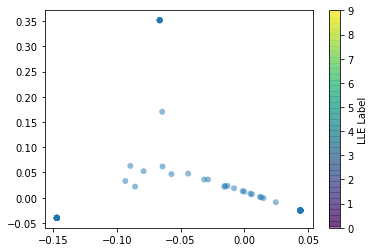

In [121]:
# Displaying the scatter plot after applying the dimensionality reduction
plt.scatter(lle_transformed_data[:, 0], lle_transformed_data[:, 1],
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Dark2', 10))
plt.colorbar(label='LLE Label', ticks=range(10))
plt.clim(0, 9);

# T-distributed Stochastic Neighbor Embedding 

## `Image Data`

In [122]:
# Importing Image Data set
from glob import glob
circle_images = [cv2.imread(file) for file in glob('gdrive/My Drive/SJSU_Data_Mining/shapes/circles/*.png')]

In [123]:
# Converting them into numpy array
circle_images = np.array(circle_images)
circle_images.shape

image = []
for i in range(0,100):
    img = circle_images[i].flatten()
    image.append(img)
image = np.array(image)

# Labeling the data
train = pd.read_csv("gdrive/My Drive/SJSU_Data_Mining/test.csv")
circle_columns = [ 'pixel'+str(i) for i in range(image.shape[1]) ]
new_data_set = pd.DataFrame(image,columns=circle_columns)
new_data_set['label'] = train['id']

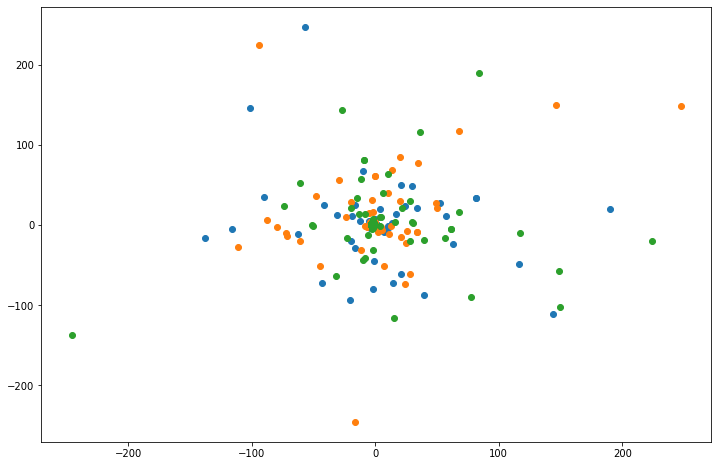

In [124]:
from sklearn.manifold import TSNE 
# implementation of TSNE Dimensionality Reduction Technique
tsne_circle_data = TSNE(n_components=3, n_iter=250).fit_transform(new_data_set[circle_columns][:100].values)
plt.figure(figsize=(12,8))

# Visualiztion of TSNE
plt.scatter(tsne_circle_data[:,0], tsne_circle_data[:,1])
plt.scatter(tsne_circle_data[:,1], tsne_circle_data[:,2])
plt.scatter(tsne_circle_data[:,2], tsne_circle_data[:,0])

## `Tabular Data`

In [125]:
# Importing the data
tsne_data = px.data.carshare()

features = tsne_data.loc[:, :'peak_hour']

# Implementation of UMAP dimensionality Reduction Technique
tsne_transformed_data = TSNE(n_components=3, random_state=0)
tsne_result = tsne_transformed_data.fit_transform(features, )


# Displaying in the 3D-scatter plot after applying dimensionality reduction
tsne_result_3D = px.scatter_3d(
    tsne_result, x=0, y=1, z=2,
    color=tsne_data.car_hours, labels={'color': 'car_hours'}
)
tsne_result_3D.update_traces(marker_size=8)
tsne_result_3D.show()

# Isometric Mapping

## `Image Data`

In [126]:
# implementation of TSNE Dimensionality Reduction Technique
from sklearn import manifold 
from sklearn.model_selection import train_test_split
isomap_data = manifold.Isomap(n_neighbors=5, n_components=3, n_jobs=-1).fit_transform(new_data_set[circle_columns][:100].values)

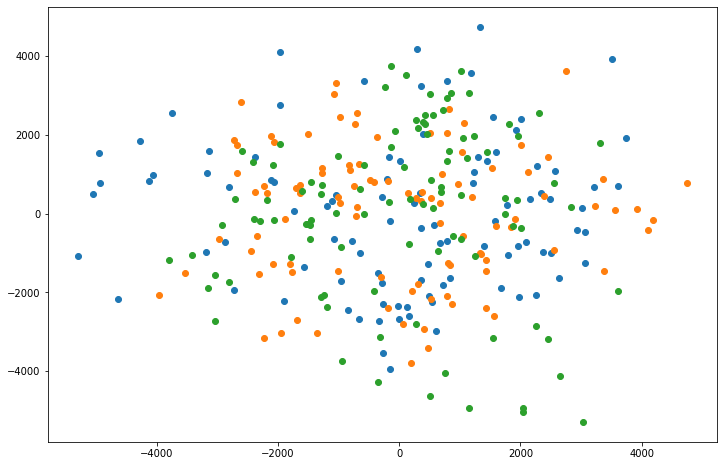

In [127]:
# Visualiztion of scatter plot after applying Dimensionality Reduction
plt.figure(figsize=(12,8))
plt.scatter(isomap_data[:,0], isomap_data[:,1])
plt.scatter(isomap_data[:,1], isomap_data[:,2])
plt.scatter(isomap_data[:,2], isomap_data[:,0])

## `Tabular Data`

In [128]:
# Importing the data
from sklearn.datasets import load_digits
isomap_digits = load_digits()
print(isomap_digits.images.shape) 
print(isomap_digits.data.shape)   

(1797, 8, 8)
(1797, 64)


In [129]:
# Reducing the dimensionality to 2 components
from sklearn.manifold import Isomap
new_isomap_data = Isomap(n_components=2)
new_isomap_data.fit(isomap_digits.data)
result_isomap = new_isomap_data.transform(isomap_digits.data)
result_isomap.shape 

(1797, 2)

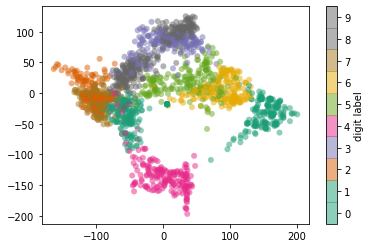

In [130]:
# Displaying the scatter plot after applying the dimensionality reduction
plt.scatter(result_isomap[:, 0], result_isomap[:, 1], c=isomap_digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Dark2', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

# Uniform Manifold Approximation and Projection


## `Image Data`

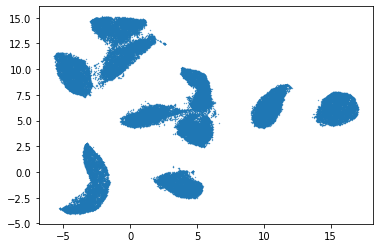

In [131]:
# Importing the data
umap_mnist_data_set = fetch_openml('mnist_784')

# Implementation of UMAP dimensionality Reduction Technique
umap_result = umap.UMAP(random_state=42).fit_transform(umap_mnist_data_set.data)

# Displaying in the scatter plot after applying dimensionality reduction
plt.scatter(umap_result[:,0], umap_result[:,1], s=0.1)

## `Tabular Data`

In [133]:
# Importing the data
car_data_set = px.data.carshare()

features = car_data_set.loc[:, :'car_hours']

# Implementation of UMAP dimensionality Reduction Technique
umap_3d_plot = UMAP(n_components=3, init='random', random_state=0)

result = umap_3d_plot.fit_transform(features)

# Displaying in the 3D-scatter plot after applying dimensionality reduction
result_3d = px.scatter_3d(
    result, x=0, y=1, z=2,
    color=car_data_set.peak_hour, labels={'color': 'peak_hour'}
)
result_3d.update_traces(marker_size=5)

result_3d.show()